# Epilepsi Kriz Tahmini


#### Ozar √ñmer Uncu - 21727815 
#### Uƒüurcan Baƒürƒ±yanƒ±k - 21526701


Bu projede, epileptik n√∂bet tespiti √∂zelliƒüine sahip, √ßok yaygƒ±n olarak kullanƒ±lan bir veri setinin √∂nceden i≈ülenmi≈ü ve yeniden yapƒ±landƒ±rƒ±lmƒ±≈ü / yeniden ≈üekillendirilmi≈ü versiyonunu kullandƒ±k. Her veri noktasƒ±, zaman i√ßinde farklƒ± bir noktadaki EEG kaydƒ±nƒ±n deƒüeridir.
* EGG (elektroensefalogram), kafa derinize takƒ±lƒ± k√º√ß√ºk, metal diskler (elektrotlar) kullanarak beyninizdeki elektriksel aktiviteyi tespit eden bir testtir.

Epileptik n√∂bet ge√ßirme ya da ge√ßirmeme ≈üeklinde 5 tip reaksiyonumuz var. 4 tip reaksiyonda n√∂bet yok, sadece ki≈üinin √ße≈üitli √∂zelliklerine g√∂re n√∂bet var. Veri setimizi epileptik n√∂bet ge√ßirip ge√ßirmemek olarak k√º√ß√ºlteceƒüiz. Projede √ße≈üitli sƒ±nƒ±flandƒ±rma y√∂ntemlerini (RandomForestClassifier, KNeighborsClassifier, SVM, Decision Tree Classifier, XGBClassifier) ‚Äã‚Äãkullandƒ±k ve kar≈üƒ±la≈ütƒ±rdƒ±k. En iyi doƒüruluk puanƒ±na katkƒ±da bulunacak olanƒ± se√ßtik.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, tree
import xgboost
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

%matplotlib inline

bold text## ƒ∞√ßerik

[Ama√ß](#purpose)   
[Verinin Anla≈üƒ±lmasƒ±](#data_understanding)   
[Verilerin Hazƒ±rlanmasƒ±](#data_preparation)   
[Modeling for Clustering](#clusteringmodel)  
[Clustering results](#clustering)    
[Modeling for Classification](#classificationmodel)  
[Evaluation](#evaluation)  
[References](#references)   


## Purpose <a class="anchor" id="purpose"></a>

Epilepsi, d√ºnya √ßapƒ±nda 65 milyon insanƒ± etkileyen olduk√ßa yaygƒ±n bir n√∂rolojik hastalƒ±ktƒ±r. Herkes epilepsi ge√ßirebilir, ancak k√º√ß√ºk √ßocuklarda ve ya≈ülƒ± yeti≈ükinlerde daha yaygƒ±ndƒ±r. Erkeklerde kadƒ±nlara g√∂re biraz daha fazla g√∂r√ºl√ºr.


Bu deneyde insanlara, epilepsi n√∂beti tespit etmenin makine √∂ƒürenimi y√∂ntemleriyle m√ºmk√ºn olabileceƒüini g√∂stermek istiyoruz. Bu notebook, 178 veri kolonundan tahminler saƒülar.
Ayrƒ±ca PCA y√∂ntemi ile birden fazla kolonu birle≈ütirme avantajƒ±na sahibiz.Bu notebook aynƒ± zamanda n√∂rologlarƒ±n i≈ü y√ºk√ºn√ºn azaltƒ±lmasƒ±na da katkƒ±da bulunuyor.
Sorunun √ß√∂z√ºm√ºne katkƒ± saƒülamaz, ancak bazƒ± sƒ±nƒ±flarƒ±n verilerden daha kolaylƒ±kla algƒ±lanmasƒ±na yardƒ±mcƒ± olabilir.



## Verinin Anla≈üƒ±lmasƒ±<a class="anchor" id="data_understanding"></a>

A≈üaƒüƒ±da g√∂rebileceƒüiniz gibi veri setimizi √∂ncelikle csv uzantƒ±lƒ± dosyadan okuyoruz. Dataframe'i panda dataframe'e √ßeviriyoruz. Ve sonra EEG sonu√ßlarƒ±nƒ±n  daƒüƒ±lƒ±mƒ±nƒ± g√∂stermek istiyoruz. G√∂rebiliyoruz ki, dataframe'imizde aynƒ± miktarda sƒ±nƒ±fƒ±mƒ±z var. Bunu grafiƒüin altƒ±ndaki tablodan da s√∂yleyebiliriz. Y s√ºtun verilerimizin ortalamasƒ±nƒ±n 3'e e≈üit olduƒüunu g√∂rebilirsiniz.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


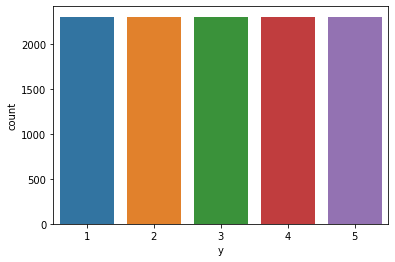

X1            X2  ...          X178             y
count  11500.000000  11500.000000  ...  11500.000000  11500.000000
mean     -11.581391    -10.911565  ...    -12.195652      3.000000
std      165.626284    166.059609  ...    164.852015      1.414275
min    -1839.000000  -1838.000000  ...  -1829.000000      1.000000
25%      -54.000000    -55.000000  ...    -55.000000      2.000000
50%       -8.000000     -8.000000  ...     -9.000000      3.000000
75%       34.000000     35.000000  ...     34.000000      4.000000
max     1726.000000   1713.000000  ...   1915.000000      5.000000

[8 rows x 179 columns]

In [ ]:
df = pd.read_csv("Epileptic Seizure Recognition.csv")
sns.countplot(df['y'],label="Count")
plt.show()
df.describe()


Yukarƒ±da her bir s√ºtunla ilgili genel bilgileri g√∂rebilirsiniz. Tablodan minimum, maksimum deƒüerleri g√∂rebilirsiniz. Daha sonra, gelecekteki s√ºre√ßlerimiz i√ßin veri h√ºcrelerimizin veri t√ºrlerini g√∂rmemiz gerekiyor. Veri t√ºrlerimizi a≈üaƒüƒ±da g√∂rebilirsiniz. Veritabanƒ±nda herhangi bir d√∂n√º≈üt√ºrmeye ihtiyacƒ±mƒ±z yok.

In [ ]:
print(df.dtypes)


Unnamed    object
X1          int64
X2          int64
X3          int64
X4          int64
            ...  
X175        int64
X176        int64
X177        int64
X178        int64
y           int64
Length: 180, dtype: object


Ama√ß b√∂l√ºm√ºnde belirttiƒüimiz gibi, sƒ±nƒ±flarƒ±mƒ±zƒ± 0 (epileptik n√∂bet yok) veya 1 (epileptik n√∂bet ge√ßirme) olarak d√º≈ü√ºrmemiz gerekiyor. N√∂bet olup olmadƒ±ƒüƒ±nƒ± belirlemek i√ßin sadece iki √∂zelliƒüe ihtiyacƒ±mƒ±z var. A≈üaƒüƒ±daki grafikten n√∂bet ge√ßirip ge√ßirmeme daƒüƒ±lƒ±mƒ±nƒ± g√∂rebilirsiniz. Grafikten g√∂r√ºyoruz ki n√∂bet ge√ßirmeyenler 4 n√∂bet ge√ßirenlere g√∂re 4 kat daha fazla.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


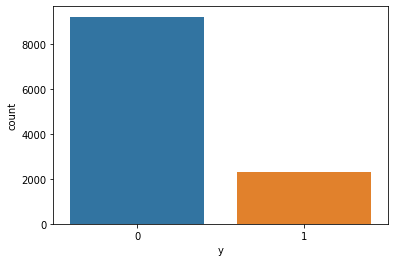

In [ ]:
#change values to have epileptic seizure or not 
df['y'] = np.where(df['y'] >1, 0,  1)
df.y.value_counts()
df_type = df.y
sns.countplot(df.y,label="Count")
plt.show()


## Verilerin Hazƒ±rlanmasƒ±<a class="anchor" id="data_preparation"></a>

In [ ]:
df.isnull().sum()

Unnamed    0
X1         0
X2         0
X3         0
X4         0
          ..
X175       0
X176       0
X177       0
X178       0
y          0
Length: 180, dtype: int64

√ñncelikle sƒ±nƒ±f s√ºtunumuzu bƒ±rakƒ±p yeni bir dataframe'e atamamƒ±z gerekiyor. ƒ∞leriki s√ºre√ßlerde, tahmin edilen deƒüerleri kar≈üƒ±la≈ütƒ±rmak i√ßin bu s√ºtuna ihtiyacƒ±mƒ±z var. Verimizde eksik deƒüer bulunmadƒ±ƒüƒ±ndan herhangi bir satƒ±r d√º≈ü√ºrmedik. Yukarƒ±da g√∂rebilirsiniz.

In [ ]:
df.head(20)
df_droppep = df.drop(["y","Unnamed"],axis = 1)


### Kolonlar arasƒ± ili≈üki
A≈üaƒüƒ±da yer alan heatmap'den s√ºtunlar arasƒ±ndaki korelasyonlarƒ± g√∂rebiliriz. Bu heatmap'i √∂nce silinen s√ºtunlara koyarƒ±z, ancak daha sonra genellikle kolonlar arasƒ±nda y√ºksek ili≈ükiler yoktur, bu y√ºzden hepsini korumayƒ± se√ßiyoruz. Bu sorunu daha sonra ele alacaƒüƒ±z. 

    X1   X2   X3   X4   X5   X6   X7  ...  X172  X173  X174  X175  X176  X177  X178
0  135  190  229  223  192  125   55  ...   -31   -77  -103  -127  -116   -83   -51
1  386  382  356  331  320  315  307  ...   146   152   157   156   154   143   129
2  -32  -39  -47  -37  -32  -36  -57  ...    48    19   -12   -30   -35   -35   -36

[3 rows x 178 columns]


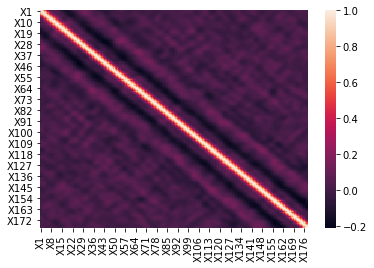

In [ ]:
label_encoder = LabelEncoder()
df.iloc[:,0] = label_encoder.fit_transform(df.iloc[:,0])
corr = df_droppep.corr()
sns.heatmap(corr)
print(df_droppep.head(3))

Verilerimizi normalle≈ütirmemiz gerekiyor √ß√ºnk√º veri setimizde √ßok sayƒ±da negatif deƒüer var. Hatalar yaratabilir veya istenmeyen tahminler saƒülayabilir. Verimiz i√ßin Min-max normalizasyonu se√ßiyoruz.
*   **Min-max normalization** ayrƒ±ca min-maks √∂l√ßeklendirme veya min-maks normalle≈ütirme olarak da bilinir, en basit y√∂ntemdir ve aralƒ±ƒüƒ± [0, 1] veya [‚àí1, 1] 'de √∂l√ßeklendirmek i√ßin √∂zellik aralƒ±ƒüƒ±nƒ±n yeniden √∂l√ßeklendirilmesinden olu≈üur.
Hedef aralƒ±ƒüƒ±n se√ßilmesi verilerin yapƒ±sƒ±na baƒülƒ±dƒ±r. Genel form√ºl
olarak verilen: ùë•'=ùë•‚àíùëöùëñùëõ(ùë•)/(ùëöùëéùë•(ùë•)‚àíùëöùëñùëõ(ùë•))
burada " x " orijinal deƒüerdir, " x' " ler normalle≈ütirilmi≈ü deƒüerdir.

Verilerimizin MinMaxScaler ile  nasƒ±l deƒüi≈ütiƒüini g√∂rebilirsiniz.




In [ ]:
scalar = MinMaxScaler() 
scalar.fit(df_droppep)
ND = scalar.transform(df_droppep)
ND = pd.DataFrame(ND)
print(df_droppep.head())
print(ND.head())


    X1   X2   X3   X4   X5   X6   X7  ...  X172  X173  X174  X175  X176  X177  X178
0  135  190  229  223  192  125   55  ...   -31   -77  -103  -127  -116   -83   -51
1  386  382  356  331  320  315  307  ...   146   152   157   156   154   143   129
2  -32  -39  -47  -37  -32  -36  -57  ...    48    19   -12   -30   -35   -35   -36
3 -105 -101  -96  -92  -89  -95 -102  ...   -80   -77   -85   -77   -72   -69   -65
4   -9  -65  -98 -102  -78  -48  -16  ...   -12   -32   -41   -65   -83   -89   -73

[5 rows x 178 columns]
        0         1         2    ...       175       176       177
0  0.553717  0.571107  0.584371  ...  0.434953  0.435612  0.474893
1  0.624123  0.625176  0.620328  ...  0.505486  0.495495  0.522970
2  0.506872  0.506618  0.506229  ...  0.456113  0.448331  0.478900
3  0.486396  0.489158  0.492356  ...  0.446447  0.439322  0.471154
4  0.513324  0.499296  0.491789  ...  0.443574  0.434022  0.469017

[5 rows x 178 columns]



## Modelleme <a class="anchor" id="classificationmodel"></a>

In [ ]:
class_X = df_droppep.copy()
class_y = df_type
X_train,X_test,y_train,y_test = train_test_split(class_X,class_y,test_size =0.30)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

√ñnce eƒüitim ve test deƒüerlerimiz i√ßin verilerimizi %70 ve %30'a b√∂ld√ºk. T√ºm sƒ±nƒ±flandƒ±rƒ±cƒ± y√∂ntemlere aynƒ± i≈ülemi almak i√ßin dizi olu≈üturuyoruz. Eƒüitim ve test verilerimizle 5 farklƒ± sƒ±nƒ±flandƒ±rma modeli kar≈üƒ±la≈ütƒ±rƒ±yoruz. Bu y√∂ntemler hakkƒ±nda k√º√ß√ºk a√ßƒ±klamalar verelim.


* XGBoost, eXtreme Gradient Boosting anlamƒ±na gelir;
gradient boosted decision trees algoritmasƒ±na dayalƒ± algoritma. XGBoost, overfittingi azaltmak i√ßin daha iyi bir d√ºzenleme tekniƒüi uygular ve gradyan artƒ±rmanƒ±n farklarƒ±ndan biridir.
---
* Uygulama libsvm'ye dayanmaktadƒ±r. Uyum s√ºresi, numune sayƒ±sƒ± ile en azƒ±ndan ikinci dereceden √∂l√ßeklenir ve on binlerce numunenin fazlasƒ±nda pratik olmayabilir. B√ºy√ºk veri k√ºmeleri i√ßin, muhtemelen bir Nystroem transformat√∂r√ºnden sonra, LinearSVC veya SGDClassifier kullanmayƒ± d√º≈ü√ºn√ºn.
---
*  Karar aƒüacƒ±, bir i√ß d√ºƒü√ºm√ºn √∂zelliƒüi (veya √∂zniteliƒüi) temsil ettiƒüi, dalƒ±n bir karar kuralƒ±nƒ± temsil ettiƒüi ve her d√ºƒü√ºm√ºn sonucu temsil ettiƒüi akƒ±≈ü ≈üemasƒ±na benzer bir aƒüa√ß yapƒ±sƒ±dƒ±r. Bir karar aƒüacƒ±ndaki en √ºst d√ºƒü√ºm, k√∂k d√ºƒü√ºm olarak bilinir. √ñznitelik deƒüerine g√∂re b√∂l√ºmlemeyi √∂ƒürenir. Aƒüacƒ±, √∂zyinelemeli b√∂l√ºmleme √ßaƒürƒ±sƒ± ile √∂zyinelemeli olarak b√∂ler.
---
*   Random forests ya da random decision forests, eƒüitim zamanƒ±nda √ßok sayƒ±da karar aƒüacƒ± olu≈üturarak ve sƒ±nƒ±flarƒ±n modu (sƒ±nƒ±flandƒ±rma) veya bireyin ortalama / ortalama tahmini (regresyon) olan sƒ±nƒ±fƒ± √ßƒ±kararak √ßalƒ±≈üan sƒ±nƒ±flandƒ±rma, regresyon ve diƒüer g√∂revler i√ßin toplu bir √∂ƒürenme y√∂ntemidir. aƒüa√ßlar.
---
*   KNN parametrik olmayan ve tembel bir √∂ƒürenme algoritmasƒ±dƒ±r. Parametrik olmayan, temel veri daƒüƒ±tƒ±mƒ± i√ßin herhangi bir varsayƒ±m olmadƒ±ƒüƒ± anlamƒ±na gelir. Ba≈üka bir deyi≈üle, veri setinden belirlenen model yapƒ±sƒ±. Bu, ger√ßek d√ºnyadaki veri k√ºmelerinin √ßoƒüunun matematiksel teorik varsayƒ±mlarƒ± takip etmediƒüi uygulamada √ßok yardƒ±mcƒ± olacaktƒ±r.
---
Yukarƒ±da g√∂rd√ºƒü√ºn√ºz gibi sƒ±nƒ±flandƒ±rma y√∂ntemlerinden bahsetmi≈ütik. Bunlarƒ± a≈üaƒüƒ±da kar≈üƒ±la≈ütƒ±rƒ±yoruz. Veri setimiz i√ßin en iyi doƒüruluk noktasƒ±nƒ± saƒülayan en iyi y√∂ntemi se√ßmemiz gerekiyor.

In [ ]:
classifiers = []
model1 = xgboost.XGBClassifier()
classifiers.append(model1)
model2 = svm.SVC()
classifiers.append(model2)
model3 = tree.DecisionTreeClassifier()
classifiers.append(model3)
model4 = RandomForestClassifier()
classifiers.append(model4)
model5 = KNeighborsClassifier()
classifiers.append(model5)


for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred= clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy of %s is %s"%(clf, acc))
    print("********************************")


Accuracy of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1) is 0.9623188405797102
********************************
Accuracy of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is 0.9669565217391304
********************************
Accuracy of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, m

Verisetindeki tahminlerimiz i√ßin en y√ºksek nokta 0.9759420289855072 ile Random forests sƒ±nƒ±flandƒ±rmasƒ±nƒ± se√ßtik. Bizim a√ßƒ±mƒ±zdan bu sƒ±nƒ±flandƒ±rma y√∂ntemi bize en iyi noktayƒ± veriyor √ß√ºnk√º tahmin i√ßin 2 sƒ±nƒ±fa ihtiyacƒ±mƒ±z var. Random forests sƒ±nƒ±flandƒ±rmasƒ±nƒ± kullanma avantajlarƒ±mƒ±z a≈üaƒüƒ±daki gibidir:


*   Random forests s√ºrece katƒ±lan karar aƒüa√ßlarƒ±nƒ±n sayƒ±sƒ± nedeniyle olduk√ßa doƒüru ve saƒülam bir y√∂ntem olarak kabul edilmektedir.
*   Overfitting problemi olmaz. Ana sebep ≈üu ki
√∂nyargƒ±larƒ± ortadan kaldƒ±ran t√ºm tahminlerin ortalamasƒ±nƒ± alƒ±r.
*  Sƒ±nƒ±flandƒ±rƒ±cƒ± i√ßin en √∂nem arzeden kolonlarƒ± se√ßmeye yardƒ±mcƒ± olur.


Veri k√ºmemizde √ßok sayƒ±da s√ºtunumuz var, bu nedenle daha kaliteli sonu√ßlar elde etmek i√ßin bunlarƒ± birle≈ütirmemiz gerekiyor. Bunun i√ßin PCA y√∂ntemini kullanacaƒüƒ±z.
*   Ger√ßek bir koordinat uzayƒ±ndaki bir nokta koleksiyonunun temel bile≈üenleri, bir dizi p birim vekt√∂rleridir; burada i-inci vekt√∂r, ilk i-1 vekt√∂rlerine ortogonal iken verilere en iyi uyan bir doƒürunun y√∂n√ºd√ºr.


Bile≈üenler i√ßin ilk grafiƒüi ve ardƒ±≈üƒ±k d√ºzenimiz i√ßin ka√ß bile≈üen olu≈üturacaƒüƒ±mƒ±zƒ± se√ßmek i√ßin varyansƒ± yazdƒ±rƒ±yoruz. Grafikten de g√∂rebileceƒüiniz gibi, 30 ile 50 arasƒ±nda bile≈üen sayƒ±sƒ±nda dirseƒüimiz var. Dolayƒ±sƒ±yla, boru hattƒ± yapƒ±mƒ±z i√ßin 45 bile≈üen se√ßebiliriz.



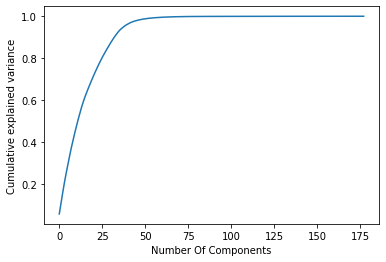

In [ ]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

pca = PCA(whiten= True).fit(df_droppep)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number Of Components')
plt.ylabel("Cumulative explained variance")
plt.show()


Ardƒ±≈üƒ±k d√ºzenimizi PCA ve RandomForestClassifier y√∂ntemleri ile olu≈üturuyoruz. 45 bile≈üenli PCA. Ayrƒ±ca iki sƒ±nƒ±flandƒ±rma y√∂ntemi arasƒ±ndaki farkƒ± g√∂rmek istiyoruz. Bu nedenle, ana sƒ±nƒ±flandƒ±rƒ±cƒ± y√∂ntemimizle kar≈üƒ±la≈ütƒ±rmak i√ßin SVC'yi se√ßiyoruz.




In [ ]:
pipe = Pipeline([('pca', PCA(n_components = 45)),('forest', RandomForestClassifier())])
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)



rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred_vPCA = rfc.predict(X_test)

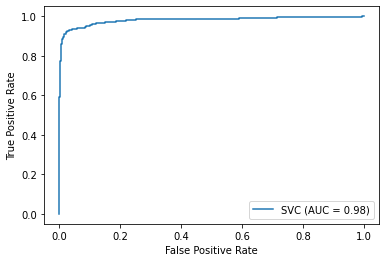

In [ ]:
pipe2 = Pipeline([('pca', PCA(n_components = 45)),('SVC', SVC(random_state=42))])
pipe.fit(X_train,y_train)
y_pred_svc = pipe.predict(X_test)
svc_disp = plot_roc_curve(svc, X_test, y_test)
plt.show()


## Deƒüerlendirme<a class="anchor" id="evaluation"></a>

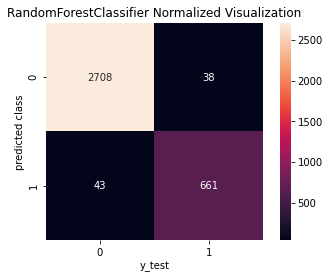

In [ ]:
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T,square = True , annot = True, fmt = 'd')
plt.title("RandomForestClassifier Normalized Visualization with PCA")
plt.xlabel('y_test')
plt.ylabel('predicted class')
plt.show()

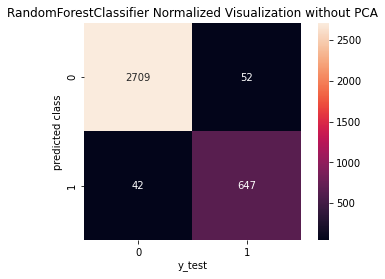

In [ ]:
mat = confusion_matrix(y_test, y_pred_vPCA)
sns.heatmap(mat.T,square = True , annot = True, fmt = 'd')
plt.title("RandomForestClassifier Normalized Visualization without PCA")
plt.xlabel('y_test')
plt.ylabel('predicted class')
plt.show()

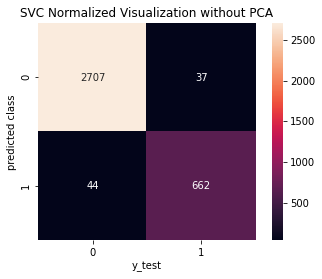

In [ ]:
mat = confusion_matrix(y_test, y_pred_svc)
sns.heatmap(mat.T,square = True , annot = True, fmt = 'd')
plt.title("SVC Normalized Visualization with PCA")
plt.xlabel('y_test')
plt.ylabel('predicted class')
plt.show()

Evaluate your model. Provide results, tables, charts, etc.




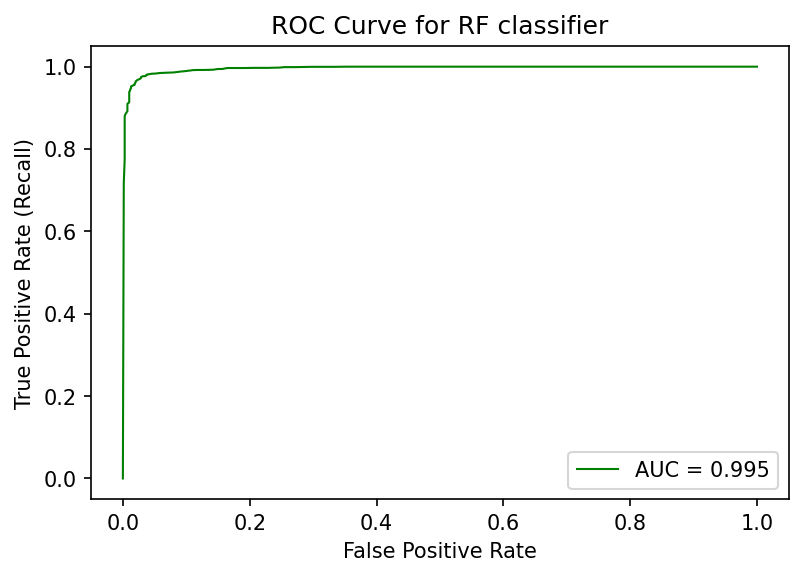

In [ ]:
from sklearn.metrics import roc_curve, auc
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

probas = rf_clf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas[:,0], pos_label=0)
roc_auc = auc(fpr, tpr)
plt.figure(dpi=150)
plt.plot(fpr, tpr, lw=1, color='green', label=f'AUC = {roc_auc:.3f}')
plt.title('ROC Curve for RF classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.legend()
plt.show()


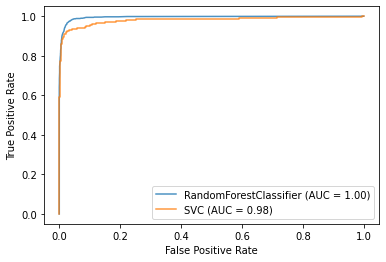

In [ ]:
ax = plt.gca()
rfc_disp = plot_roc_curve(rfc, X_test, y_test, ax=ax, alpha=0.8)
svc_disp.plot(ax=ax, alpha=0.8)
plt.show()


ƒ∞ki sƒ±nƒ±flandƒ±rma y√∂ntemini auc skoru ile kar≈üƒ±la≈ütƒ±rƒ±yoruz. Daha iyi doƒüruluƒüu i√ßin daha √∂nce rastgele orman sƒ±nƒ±flandƒ±rƒ±cƒ±sƒ±nƒ± se√ßtik. Ancak performanslarƒ±nda farklƒ±lƒ±klar g√∂stermek istiyoruz. Isƒ± haritalarƒ± arasƒ±ndaki farklƒ±lƒ±klarƒ± da g√∂rebilirsiniz. Svc ve randomforest sƒ±nƒ±flandƒ±rƒ±cƒ± arasƒ±nda √ßok az fark vardƒ±r.

## Referanslar<a class="anchor" id="references"></a>

**√áalƒ±≈ümamƒ±z sƒ±rasƒ±nda kullandƒ±ƒüƒ±mƒ±z t√ºm kaynaklar.**


*   https://www.kaggle.com/jaketuricchi/using-pca-and-clustering-to-improve-classification
*   https://machinelearningmastery.com/calculate-feature-importance-with-python/#:~:text=Feature%20importance%20refers%20to%20techniques,at%20predicting%20a%20target%20variable.
*   https://www.datacamp.com/community/tutorials/random-forests-classifier-python
*   https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
*   https://www.analyseup.com/learn-python-for-data-science/python-random-forest-feature-importance-plot.html
*   https://www.kdnuggets.com/2017/06/7-steps-mastering-data-preparation-python.html
*   https://www.kaggle.com/harunshimanto/epileptic-seizure-recognition
*   https://www.healthline.com/health/epilepsy
*   https://www.datatechnotes.com/2019/07/classification-example-with.html
*   https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
*   https://www.datacamp.com/community/tutorials/decision-tree-classification-python
*   https://en.wikipedia.org/wiki/Principal_component_analysis
*   https://medium.com/@gulcanogundur/pca-principal-component-analysis-temel-bile%C5%9Fenler-analizi-bf9098751c62







**Disclaimer!** <font color='grey'>Bu notebook Ozar √ñmer Uncu ve Uƒüurcan Baƒürƒ±yanƒ±k tarafƒ±ndan **BBM469 - Veri Yoƒüunluklu Uygulamalar Laboratuvarƒ±** dersi i√ßin hazƒ±rlandƒ±. Yalnƒ±zca eƒüitim ama√ßlƒ±dƒ±r. √ñƒürenci √ßalƒ±≈ümasƒ± olduƒüu i√ßin saƒülanan i√ßeriƒüin doƒüruluƒüu konusunda herhangi bir garanti yoktur.

Herhangi bir telif hakkƒ± ihlali olduƒüunu d√º≈ü√ºn√ºyorsanƒ±z, l√ºtfen bize [bildirin](https://forms.gle/BNNRB2kR8ZHVEREq8). 
</font>